# 사전 준비

## 패키지

In [1]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm

# 그래프 스타일
%matplotlib inline
sns.set(style="whitegrid")

## 폰트

In [2]:
# 폰트 경로 지정
font_path = '../src/KoPubWorld Batang Medium.ttf'

# matplotlib에 폰트 등록
fm.fontManager.addfont(font_path)

# 폰트 이름 확인
prop = fm.FontProperties(fname=font_path)
font_name = prop.get_name()
print(f"matplotlib에 등록된 폰트 이름: {font_name}")

# matplotlib의 기본 폰트 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

matplotlib에 등록된 폰트 이름: KoPubWorldBatang


## 함수 모음

In [3]:
# 만 단위 포맷터
def format_man(x, _):
    return f'{x / 10000:.0f}'

# 백만 단위 포맷터
def format_millions(x, _):
    return f'{x / 1_000_000:.1f}'

# 코드 시작

In [4]:
file_path = "../yelp_dataset/yelp_academic_dataset_review.json"

# total lines 미리 세기 (tqdm 활용)
with open(file_path, 'r', encoding='utf-8') as f:
    total_lines = sum(1 for _ in f)

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=total_lines, desc="Loading reviews"):
        data.append(json.loads(line))

df = pd.DataFrame(data)

Loading reviews: 100%|██████████| 6990280/6990280 [00:26<00:00, 260308.68it/s]


In [5]:
print("데이터 크기:", df.shape)
print("\n컬럼 목록:\n", df.columns.tolist())
print("\n샘플 데이터:")
display(df.head())

데이터 크기: (6990280, 9)

컬럼 목록:
 ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']

샘플 데이터:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [6]:
# 날짜 문자열 → datetime 타입 변환
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 연도, 월, 요일 파생 컬럼
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

### 결측치 확인

In [7]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
month          0
dtype: int64

## 시각화

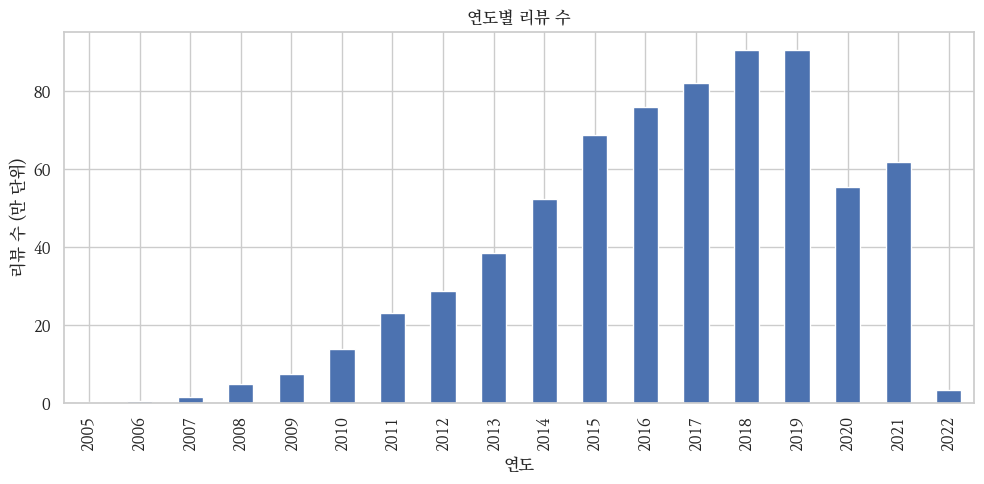

In [8]:
# 시각화
plt.figure(figsize=(10, 5))
df['year'].value_counts().sort_index().plot(kind='bar')

# 제목 및 축 이름
plt.title("연도별 리뷰 수")
plt.xlabel("연도")
plt.ylabel("리뷰 수 (만 단위)")

# Y축 숫자 포맷 변경
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_man))

plt.tight_layout()
plt.show()

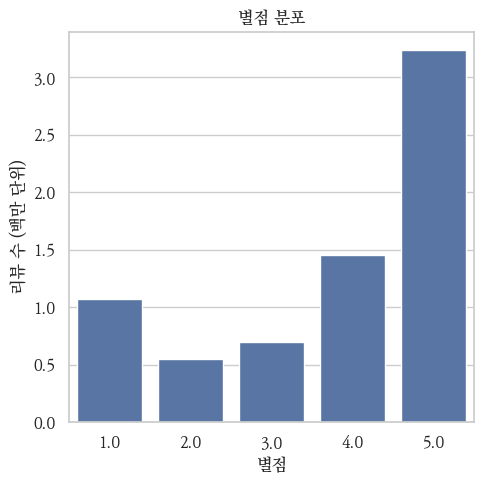

In [9]:
# 플롯
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='stars', order=sorted(df['stars'].unique()))

# 제목 및 레이블
plt.title("별점 분포")
plt.xlabel("별점")
plt.ylabel("리뷰 수 (백만 단위)")

# Y축 포맷 적용
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.tight_layout()
plt.show()

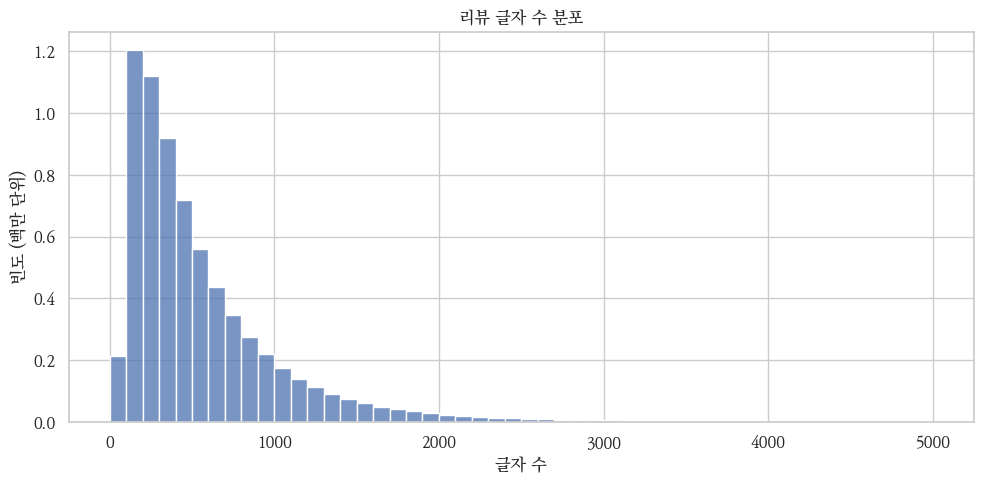

In [10]:
# text 길이 계산
df['text_length'] = df['text'].str.len()

# 히스토그램 시각화
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50)

# 제목 및 축 레이블
plt.title("리뷰 글자 수 분포")
plt.xlabel("글자 수")
plt.ylabel("빈도 (백만 단위)")

# Y축 눈금 포맷 적용
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))

plt.tight_layout()
plt.show()